In [2]:
import numpy as np

reads = np.load('../split_gen_gvcf/chr.22.AU1274.AU1274202.AU1274201.gen.npy')

In [5]:
print(reads.shape)


(7, 51304566, 6)
[0 0 0 ... 0 0 0]


In [7]:
num_reads = np.sum(reads[:, :, 1:], axis=(0, 2))
print(np.sum(num_reads > 0))

219751


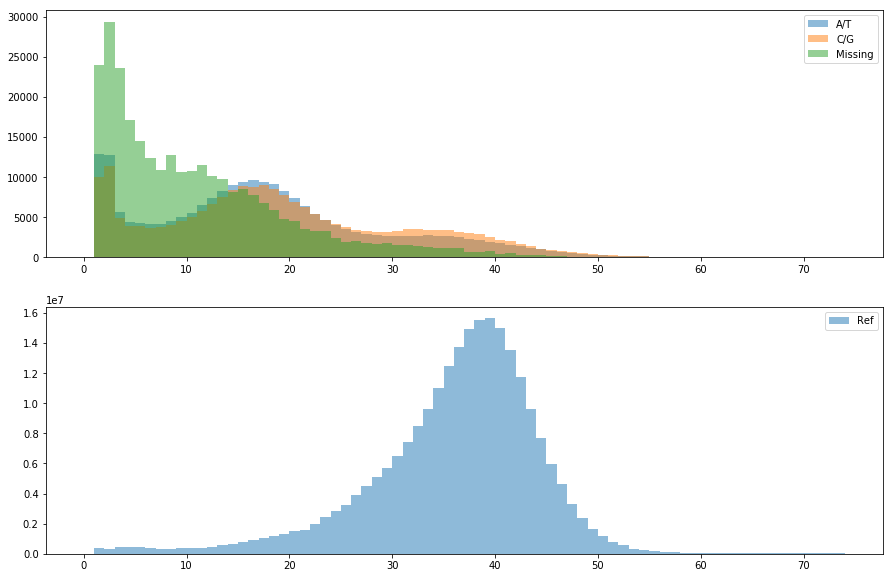

In [62]:
import matplotlib.pyplot as plt
import math

base = 1.4
max_length = 75
min_length = 0

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
v = reads[:, :, (1, 4)]
plt.hist(v[v != 0], label='A/T', alpha=0.5, bins=range(min_length, max_length, 1))
v = reads[:, :, (2, 3)]
plt.hist(v[v != 0], label='C/G', alpha=0.5, bins=range(min_length, max_length, 1))
v = reads[:, :, 5]
plt.hist(v[v != 0], label='Missing', alpha=0.5, bins=range(min_length, max_length, 1))   
plt.legend()

plt.subplot(2, 1, 2)
v = reads[:, :, 0]
plt.hist(v[v != 0], label='Ref', alpha=0.5, bins=range(min_length, max_length, 1))  
plt.legend()

plt.show()

In [94]:
total_reads = np.sum(reads, axis=2)
adj_reads = reads/total_reads[:, :, np.newaxis]
print(adj_reads[0, 0, 0])
np.nan_to_num(adj_reads, copy=False)
print(adj_reads[0, 0, 0])

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


nan
0.0


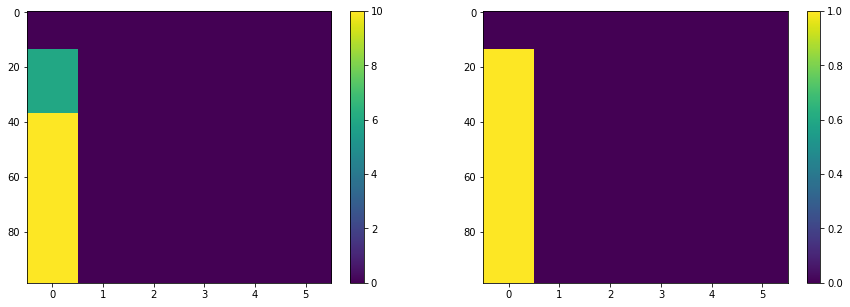

In [95]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(reads[0, 16050001:16050100, :], aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(adj_reads[0, 16050001:16050100, :], aspect='auto')
plt.colorbar()

plt.show()

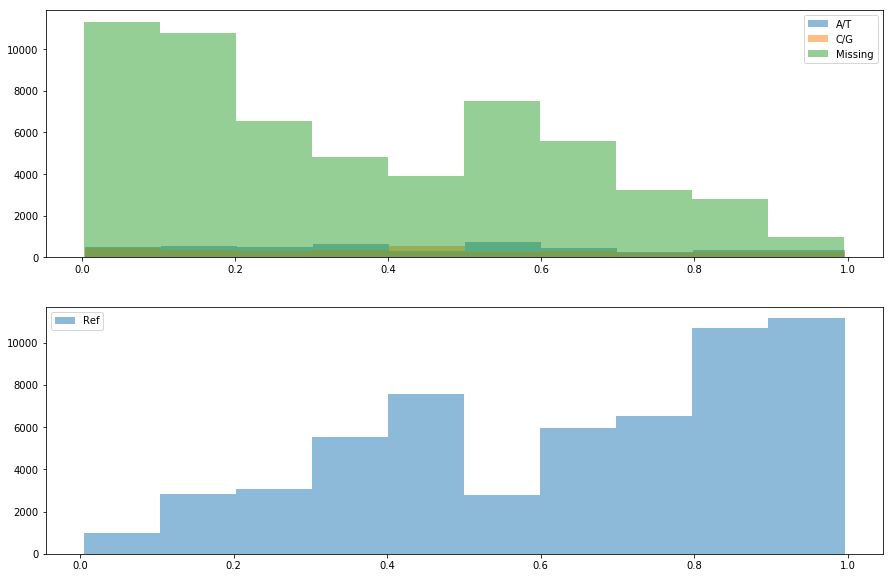

In [97]:
import matplotlib.pyplot as plt
import math

base = 1.4
max_length = 75
min_length = 0

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
v = adj_reads[:, :, (1, 4)]
plt.hist(v[(v != 0) & (v != 1)], label='A/T', alpha=0.5)
v = adj_reads[:, :, (2, 3)]
plt.hist(v[(v != 0) & (v != 1)], label='C/G', alpha=0.5)
v = adj_reads[:, :, 5]
plt.hist(v[(v != 0) & (v != 1)], label='Missing', alpha=0.5)   
plt.legend()

plt.subplot(2, 1, 2)
v = adj_reads[:, :, 0]
plt.hist(v[(v != 0) & (v != 1)], label='Ref', alpha=0.5)  
plt.legend()

plt.show()

In [61]:
index = 1
num_reads = np.sum(reads, axis=(0, 2))
print(np.sum(reads[:, 1:, 1:] != reads[:, :-1, 1:]))

1000585


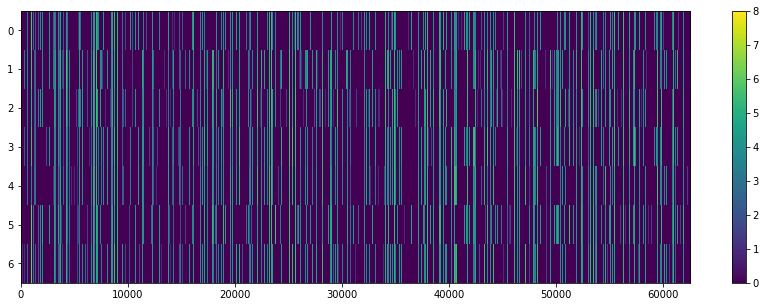

In [58]:
plt.figure(figsize=(15, 5))
plt.imshow(np.log2(1+reads[:, np.where(num_reads[1:] != num_reads[:-1])[0], index].astype(int)), aspect='auto')
plt.colorbar()
plt.show()